In [97]:
# Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

# Scikit-Learn and Imbalanced-learn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,\
  roc_curve, auc, accuracy_score, roc_auc_score, precision_recall_curve,\
  precision_score, recall_score
from imblearn.over_sampling import SMOTE

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, TensorDataset

# XGBoost
from xgboost import XGBClassifier

In [33]:
# Load dataset
data = pd.read_csv('creditcard.csv')

# Normalize 'Amount' and 'Time'
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])
data['Time'] = scaler.fit_transform(data[['Time']])

# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


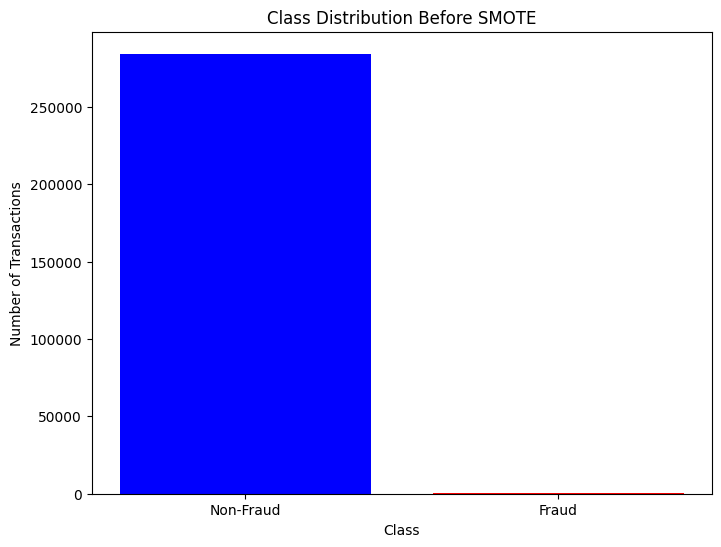

In [34]:
# Visualize class distribution before SMOTE
class_distribution = y.value_counts()

plt.figure(figsize=(8, 6))
plt.bar(class_distribution.index, class_distribution.values, color=['blue', 'red'])
plt.xticks([0, 1], labels=['Non-Fraud', 'Fraud'])
plt.title('Class Distribution Before SMOTE')
plt.ylabel('Number of Transactions')
plt.xlabel('Class')
plt.show()


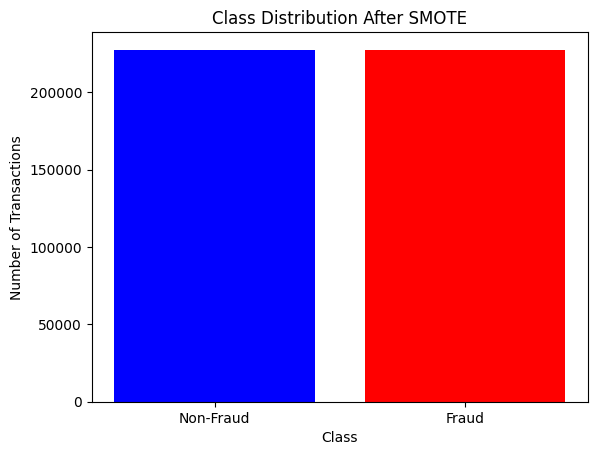

In [35]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Visualize new class distribution
resampled_distribution = pd.Series(y_train_resampled).value_counts()
plt.bar(resampled_distribution.index, resampled_distribution.values, color=['blue', 'red'])
plt.xticks([0, 1], labels=['Non-Fraud', 'Fraud'])
plt.title('Class Distribution After SMOTE')
plt.ylabel('Number of Transactions')
plt.xlabel('Class')
plt.show()


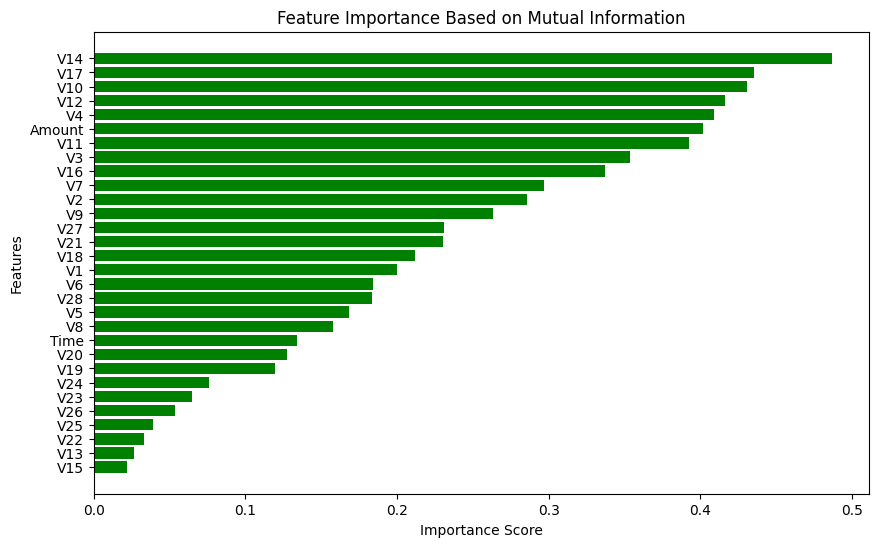

In [36]:
# Feature importance using mutual information
feature_importances = mutual_info_classif(X_train_resampled, y_train_resampled)

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='green')
plt.gca().invert_yaxis()
plt.title('Feature Importance Based on Mutual Information')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [ ]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    # Generate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_labels = ['Non-Fraud', 'Fraud']
    
    # Create the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
    
    # Labels and title
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_true, y_pred, target_names=cm_labels))

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56849    15]
 [   16    82]]


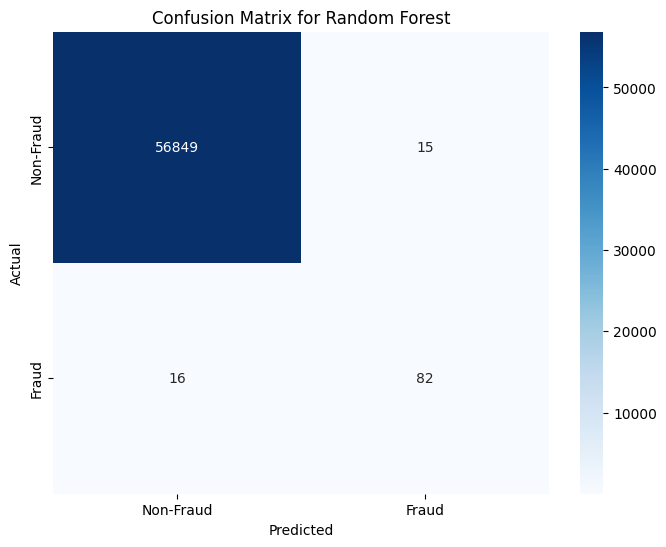


Classification Report for Random Forest:

              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.85      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predictions and Metrics
y_pred_rf = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]

plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

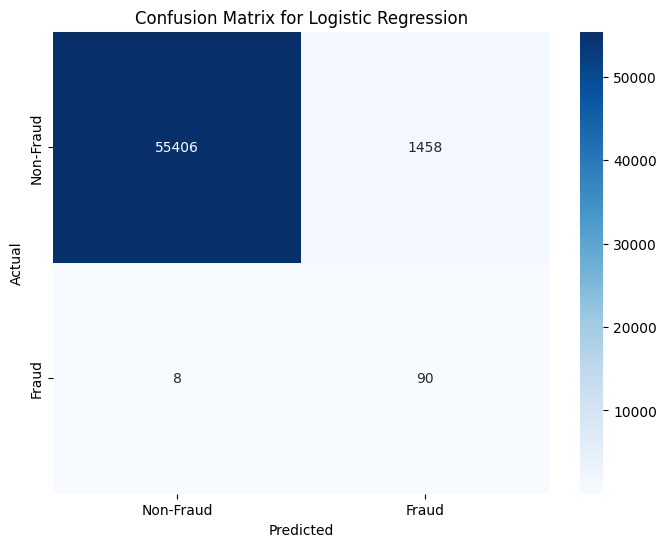


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

   Non-Fraud       1.00      0.97      0.99     56864
       Fraud       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [ ]:
# Train Logistic Regression
lr_model = LogisticRegression(max_iter=100, random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)

# Predictions and Metrics
y_pred_lr = lr_model.predict(X_test)
lr_proba = lr_model.predict_proba(X_test)[:, 1]

plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")

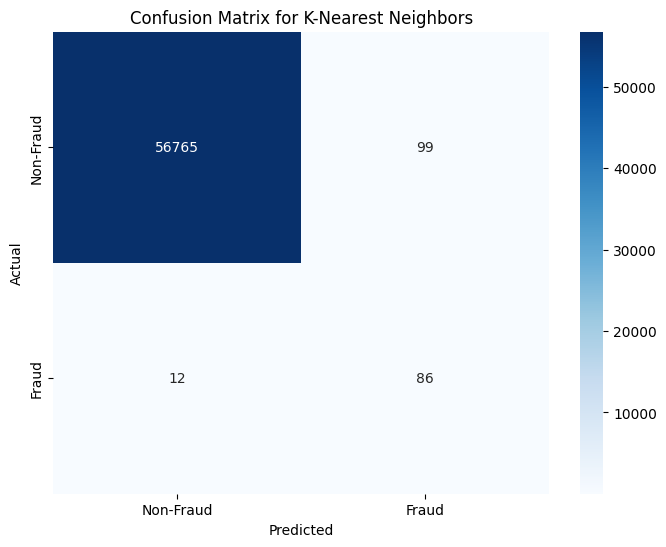


Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.46      0.88      0.61        98

    accuracy                           1.00     56962
   macro avg       0.73      0.94      0.80     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_resampled, y_train_resampled)

# Predictions and Metrics
y_pred_knn = knn_model.predict(X_test)
knn_proba = knn_model.predict_proba(X_test)[:, 1]

plot_confusion_matrix(y_test, y_pred_knn, "K-Nearest Neighbors")

/home/siddharth/College Sem/Sem 3/Data Mining/Presentation/project/.venv/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [04:33:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


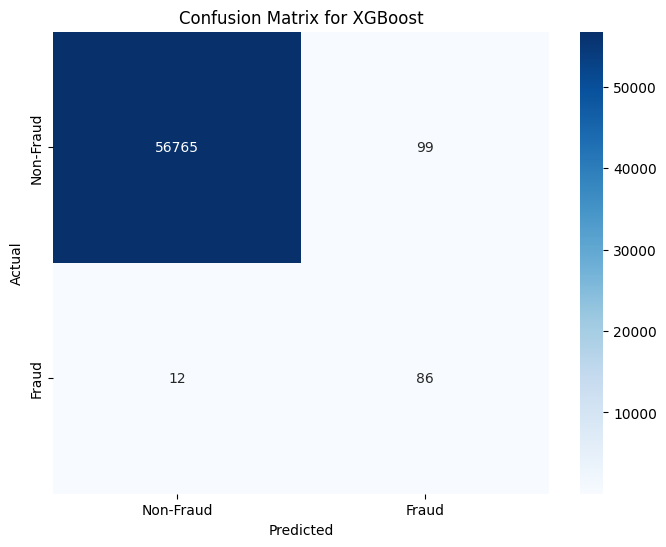


Classification Report for XGBoost:

              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.46      0.88      0.61        98

    accuracy                           1.00     56962
   macro avg       0.73      0.94      0.80     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predictions and Metrics
y_pred_xgb = xgb_model.predict(X_test)
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

plot_confusion_matrix(y_test, y_pred_knn, "XGBoost")

In [42]:
# Prepare Data for PyTorch
X_train_tensor = torch.tensor(X_train_resampled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
class FraudDetectionCNN17(nn.Module):
    def __init__(self):
        super(FraudDetectionCNN17, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=(3, 1), stride=1, padding=(1, 0)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 1), stride=(2, 1)),
            nn.Conv2d(32, 64, kernel_size=(3, 1), stride=1, padding=(1, 0)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 1), stride=(2, 1)),
            nn.Dropout(0.25),
            nn.Conv2d(64, 128, kernel_size=(3, 1), stride=1, padding=(1, 0)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 1), stride=(2, 1))
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 3 * 1, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 2),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

In [ ]:
class FraudDetectionCNN20(nn.Module):
    def __init__(self):
        super(FraudDetectionCNN20, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=(3, 1), stride=1, padding=(1, 0)),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 1), stride=(2, 1)),
            nn.Conv2d(32, 64, kernel_size=(3, 1), stride=1, padding=(1, 0)),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 1), stride=(2, 1)),
            nn.Dropout(0.25),
            nn.Conv2d(64, 128, kernel_size=(3, 1), stride=1, padding=(1, 0)),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 1), stride=(2, 1)),
            nn.Conv2d(128, 256, kernel_size=(3, 1), stride=1, padding=(1, 0)),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 1), stride=(2, 1))
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 1 * 1, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 2),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

In [90]:
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler=None, epochs=20, gradient_clip=1.0):
    training_losses = []
    validation_losses = []
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            
            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), gradient_clip)
            
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        training_losses.append(train_loss)
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
        val_loss /= len(val_loader)
        validation_losses.append(val_loss)
        
        # Learning rate adjustment
        if scheduler:
            scheduler.step()
        
        print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")
    
    return training_losses, validation_losses

In [91]:
def evaluate_model(model, test_loader):
    model.eval()
    y_true = []
    y_pred = []
    y_proba = []
    
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            probs = nn.functional.softmax(outputs, dim=1)[:, 1]
            _, predicted = torch.max(outputs, 1)
            y_true.extend(y_batch.numpy())
            y_pred.extend(predicted.numpy())
            y_proba.extend(probs.numpy())
    
    return y_true, y_pred, y_proba

In [92]:
X_train_tensor = torch.tensor(X_train_resampled.values).reshape(-1, 1, 30, 1).float()
y_train_tensor = torch.tensor(y_train_resampled.values).long()
X_test_tensor = torch.tensor(X_test.values).reshape(-1, 1, 30, 1).float()
y_test_tensor = torch.tensor(y_test.values).long()

In [93]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [98]:
model_17 = FraudDetectionCNN17()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_17.parameters(), lr=0.001)

scheduler = StepLR(optimizer, step_size=5, gamma=0.5)

print("Training 17-Layer CNN")
training_losses_17, validation_losses_17 = train_model(model_17, train_loader, test_loader, criterion, optimizer, scheduler, epochs=20)
y_test_labels_17, y_test_preds_17, cnn_proba_17 = evaluate_model(model_17, test_loader)

Training 17-Layer CNN
Epoch 1/20, Training Loss: 0.3418, Validation Loss: 0.3242
Epoch 2/20, Training Loss: 0.3237, Validation Loss: 0.3313
Epoch 3/20, Training Loss: 0.3207, Validation Loss: 0.3208
Epoch 4/20, Training Loss: 0.3233, Validation Loss: 0.3288
Epoch 5/20, Training Loss: 0.3283, Validation Loss: 0.3274
Epoch 6/20, Training Loss: 0.3250, Validation Loss: 0.3330
Epoch 7/20, Training Loss: 0.3234, Validation Loss: 0.3318
Epoch 8/20, Training Loss: 0.3223, Validation Loss: 0.3222
Epoch 9/20, Training Loss: 0.3231, Validation Loss: 0.3231
Epoch 10/20, Training Loss: 0.3223, Validation Loss: 0.3237
Epoch 11/20, Training Loss: 0.3207, Validation Loss: 0.3194
Epoch 12/20, Training Loss: 0.3195, Validation Loss: 0.3179
Epoch 13/20, Training Loss: 0.3194, Validation Loss: 0.3171
Epoch 14/20, Training Loss: 0.3195, Validation Loss: 0.3216
Epoch 15/20, Training Loss: 0.3196, Validation Loss: 0.3201
Epoch 16/20, Training Loss: 0.3187, Validation Loss: 0.3204
Epoch 17/20, Training Loss:

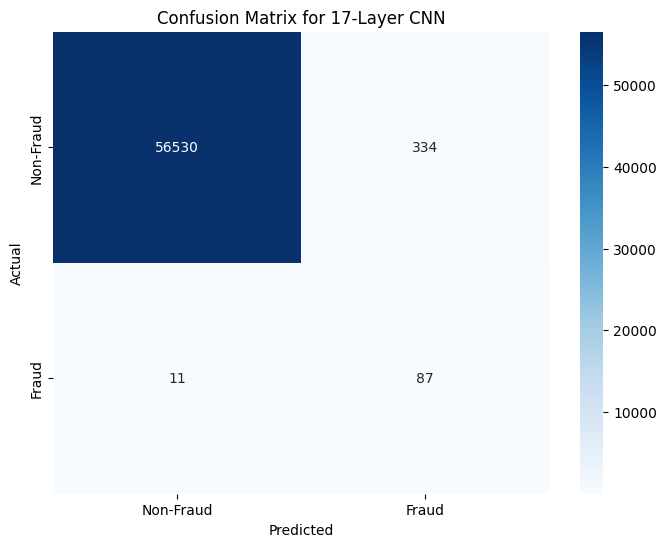


Classification Report for 17-Layer CNN:

              precision    recall  f1-score   support

   Non-Fraud       1.00      0.99      1.00     56864
       Fraud       0.21      0.89      0.34        98

    accuracy                           0.99     56962
   macro avg       0.60      0.94      0.67     56962
weighted avg       1.00      0.99      1.00     56962



In [99]:
plot_confusion_matrix(y_test_labels_17, y_test_preds_17, "17-Layer CNN")

In [102]:
model_20 = FraudDetectionCNN20()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_20.parameters(), lr=0.001)

scheduler = StepLR(optimizer, step_size=5, gamma=0.5)

print("Training 20-Layer CNN")
training_losses_20, validation_losses_20 = train_model(model_20, train_loader, test_loader, criterion, optimizer, scheduler, epochs=20)
y_test_labels_20, y_test_preds_20, cnn_proba_20 = evaluate_model(model_20, test_loader)

Training 20-Layer CNN
Epoch 1/20, Training Loss: 0.3445, Validation Loss: 0.3234
Epoch 2/20, Training Loss: 0.3280, Validation Loss: 0.3219
Epoch 3/20, Training Loss: 0.3248, Validation Loss: 0.3221
Epoch 4/20, Training Loss: 0.3230, Validation Loss: 0.3218
Epoch 5/20, Training Loss: 0.3232, Validation Loss: 0.3226
Epoch 6/20, Training Loss: 0.3223, Validation Loss: 0.3216
Epoch 7/20, Training Loss: 0.3219, Validation Loss: 0.3216
Epoch 8/20, Training Loss: 0.3199, Validation Loss: 0.3185
Epoch 9/20, Training Loss: 0.3188, Validation Loss: 0.3192
Epoch 10/20, Training Loss: 0.3185, Validation Loss: 0.3253
Epoch 11/20, Training Loss: 0.3171, Validation Loss: 0.3172
Epoch 12/20, Training Loss: 0.3163, Validation Loss: 0.3184
Epoch 13/20, Training Loss: 0.3157, Validation Loss: 0.3171
Epoch 14/20, Training Loss: 0.3156, Validation Loss: 0.3168
Epoch 15/20, Training Loss: 0.3154, Validation Loss: 0.3167
Epoch 16/20, Training Loss: 0.3151, Validation Loss: 0.3174
Epoch 17/20, Training Loss:

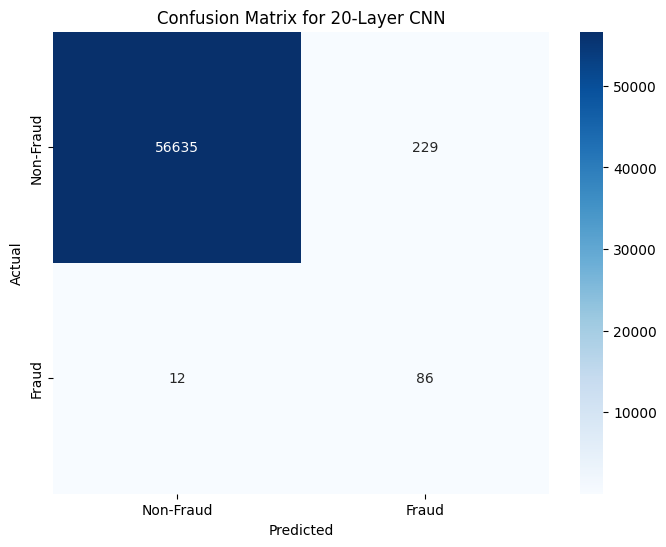


Classification Report for 20-Layer CNN:

              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.27      0.88      0.42        98

    accuracy                           1.00     56962
   macro avg       0.64      0.94      0.71     56962
weighted avg       1.00      1.00      1.00     56962



In [103]:
plot_confusion_matrix(y_test_labels_20, y_test_preds_20, "20-Layer CNN")

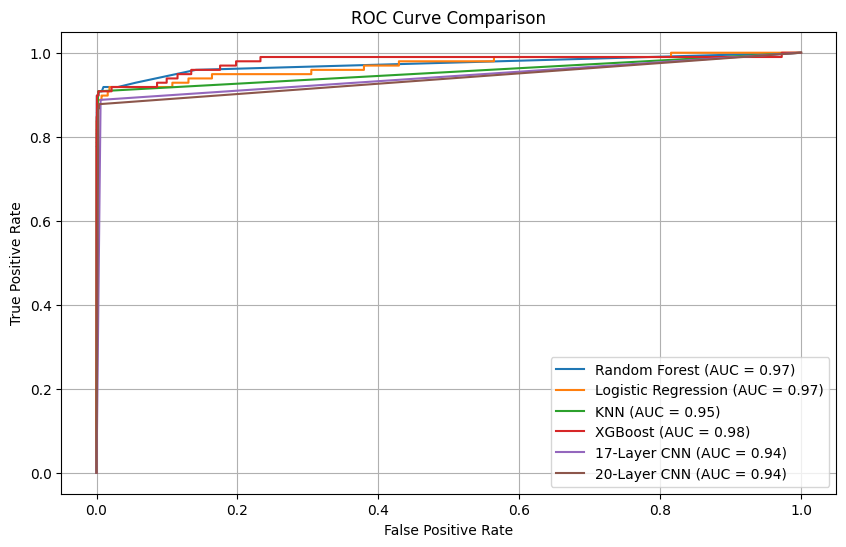

In [104]:
# Plot ROC Curves for All Models
plt.figure(figsize=(10, 6))

# RF
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_proba)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})")

# KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_proba)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {roc_auc_knn:.2f})")

# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})")

# CNN (17-layer)
fpr_cnn17, tpr_cnn17, _ = roc_curve(y_test, cnn_proba_17)
roc_auc_cnn17 = auc(fpr_cnn17, tpr_cnn17)
plt.plot(fpr_cnn17, tpr_cnn17, label=f"17-Layer CNN (AUC = {roc_auc_cnn17:.2f})")

# CNN (20-layer)
fpr_cnn20, tpr_cnn20, _ = roc_curve(y_test, cnn_proba_20)
roc_auc_cnn20 = auc(fpr_cnn20, tpr_cnn20)
plt.plot(fpr_cnn20, tpr_cnn20, label=f"20-Layer CNN (AUC = {roc_auc_cnn20:.2f})")

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [105]:
def calculate_metrics(y_true, y_pred, y_proba, model_name):
    """
    Calculate and return evaluation metrics for a model.
    """
    # Confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Accuracy, Precision, Recall
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)

    # AUC (ROC) and AUC (PRC)
    roc_auc = roc_auc_score(y_true, y_proba)
    precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_proba)
    prc_auc = auc(recall_vals, precision_vals)

    return {
        "Model": model_name,
        "Loss": "N/A",
        "TP": tp,
        "FP": fp,
        "TN": tn,
        "FN": fn,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "AUC": roc_auc,
        "PRC": prc_auc,
    }

In [106]:
rf_metrics = calculate_metrics(y_test, y_pred_rf, rf_proba, "Random Forest")

In [107]:
lr_metrics = calculate_metrics(y_test, y_pred_lr, lr_proba, "Logistic Regression")

In [108]:
knn_metrics = calculate_metrics(y_test, y_pred_knn, knn_proba, "KNN")

In [109]:
xgb_metrics = calculate_metrics(y_test, y_pred_xgb, xgb_proba, "XGBoost")

In [110]:
cnn_17_metrics = calculate_metrics(y_test, y_test_preds_17, cnn_proba_17, "17-Layer CNN")
cnn_17_metrics["Loss"] = np.average(validation_losses_17)

In [111]:
cnn_20_metrics = calculate_metrics(y_test, y_test_preds_20, cnn_proba_20, "20-Layer CNN")
cnn_20_metrics["Loss"] = np.average(validation_losses_20)

In [112]:
table = PrettyTable()
table.field_names = ["Model", "Loss", "TP", "FP", "TN", "FN", "Accuracy", "Precision", "Recall", "AUC", "PRC"]

# Add rows for each model
for metrics in [rf_metrics, lr_metrics, knn_metrics, xgb_metrics, cnn_17_metrics, cnn_20_metrics]:
    table.add_row([
        metrics["Model"], metrics["Loss"], metrics["TP"], metrics["FP"],
        metrics["TN"], metrics["FN"], f"{metrics['Accuracy']:.4f}",
        f"{metrics['Precision']:.4f}", f"{metrics['Recall']:.4f}",
        f"{metrics['AUC']:.4f}", f"{metrics['PRC']:.4f}"
    ])

# Print the table
print(table)

+---------------------+--------------------+----+------+-------+----+----------+-----------+--------+--------+--------+
|        Model        |        Loss        | TP |  FP  |   TN  | FN | Accuracy | Precision | Recall |  AUC   |  PRC   |
+---------------------+--------------------+----+------+-------+----+----------+-----------+--------+--------+--------+
|    Random Forest    |        N/A         | 82 |  15  | 56849 | 16 |  0.9995  |   0.8454  | 0.8367 | 0.9731 | 0.8766 |
| Logistic Regression |        N/A         | 90 | 1458 | 55406 | 8  |  0.9743  |   0.0581  | 0.9184 | 0.9698 | 0.7703 |
|         KNN         |        N/A         | 86 |  99  | 56765 | 12 |  0.9981  |   0.4649  | 0.8776 | 0.9536 | 0.7720 |
|       XGBoost       |        N/A         | 87 |  32  | 56832 | 11 |  0.9992  |   0.7311  | 0.8878 | 0.9792 | 0.8773 |
|     17-Layer CNN    | 0.3230209558650299 | 87 | 334  | 56530 | 11 |  0.9939  |   0.2067  | 0.8878 | 0.9410 | 0.5481 |
|     20-Layer CNN    | 0.31938279049197

In [113]:
loss_table = PrettyTable()
loss_table.field_names = ["Epoch", "17-Layer Train Loss", "17-Layer Val Loss", "20-Layer Train Loss", "20-Layer Val Loss"]

# Add rows for each epoch
for epoch in range(len(training_losses_17)):
    loss_table.add_row([
        epoch + 1, f"{training_losses_17[epoch]:.4f}", f"{validation_losses_17[epoch]:.4f}",
        f"{training_losses_20[epoch]:.4f}", f"{validation_losses_20[epoch]:.4f}"
    ])

# Print the table
print(loss_table)

+-------+---------------------+-------------------+---------------------+-------------------+
| Epoch | 17-Layer Train Loss | 17-Layer Val Loss | 20-Layer Train Loss | 20-Layer Val Loss |
+-------+---------------------+-------------------+---------------------+-------------------+
|   1   |        0.3418       |       0.3242      |        0.3445       |       0.3234      |
|   2   |        0.3237       |       0.3313      |        0.3280       |       0.3219      |
|   3   |        0.3207       |       0.3208      |        0.3248       |       0.3221      |
|   4   |        0.3233       |       0.3288      |        0.3230       |       0.3218      |
|   5   |        0.3283       |       0.3274      |        0.3232       |       0.3226      |
|   6   |        0.3250       |       0.3330      |        0.3223       |       0.3216      |
|   7   |        0.3234       |       0.3318      |        0.3219       |       0.3216      |
|   8   |        0.3223       |       0.3222      |        0

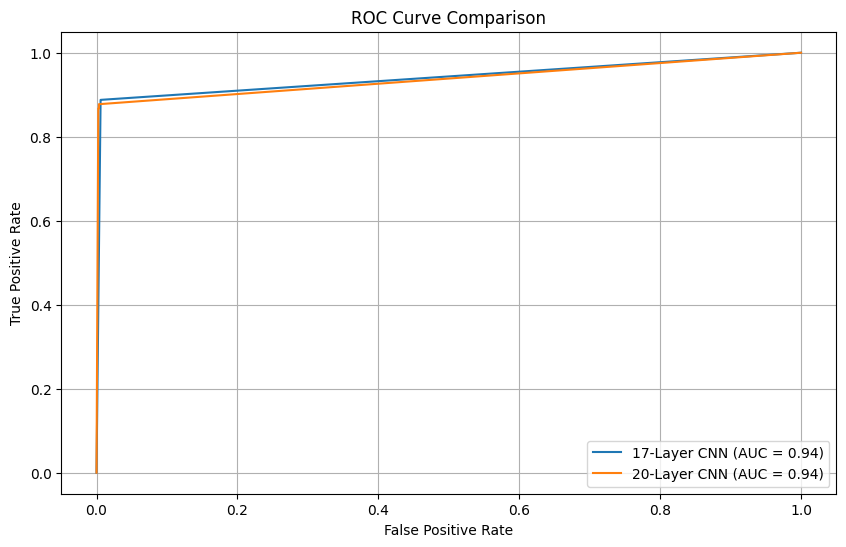

In [114]:
plt.figure(figsize=(10, 6))
# CNN (17-layer)
fpr_cnn17, tpr_cnn17, _ = roc_curve(y_test, cnn_proba_17)
roc_auc_cnn17 = auc(fpr_cnn17, tpr_cnn17)
plt.plot(fpr_cnn17, tpr_cnn17, label=f"17-Layer CNN (AUC = {roc_auc_cnn17:.2f})")

# CNN (20-layer)
fpr_cnn20, tpr_cnn20, _ = roc_curve(y_test, cnn_proba_20)
roc_auc_cnn20 = auc(fpr_cnn20, tpr_cnn20)
plt.plot(fpr_cnn20, tpr_cnn20, label=f"20-Layer CNN (AUC = {roc_auc_cnn20:.2f})")

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()